# APPLIED MACHINE LEARNING ASSIGNMENT 2

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART A: CLUSTERING

### Contents
1. Data Preparation <br />
2. Preprocessing & Scaling <br />
3. K-Means Clustering

Data Preparation
==============

### Understand Dataset
Wine Dataset from https://archive.ics.uci.edu/ml/datasets/wine

![](image\dataset_info.png)

### Import Dataset

In [539]:
import pandas as pd

df = pd.read_csv('data/wine.data', header=None, sep=',')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### List DataFrame Info

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [541]:
df = df.drop([0], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Preprocessing & Scaling
=====================

### Standardization

In [542]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(df)

### Dimension Reduction (PCA)

In [543]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=13)
mainComponents = pca_model.fit_transform(X_std)

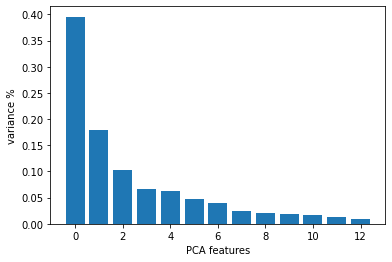

In [544]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.show()

X_pca = pd.DataFrame(mainComponents)

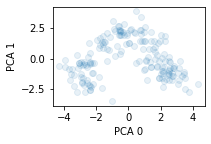

In [545]:
plt.subplot(221)
plt.scatter(X_pca[0], X_pca[1], alpha=.1)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')

# plt.subplot(222)
# plt.scatter(X_pca[0], X_pca[2], alpha=.1)
# plt.xlabel('PCA 0')
# plt.ylabel('PCA 2')

# plt.subplot(223)
# plt.scatter(X_pca[1], X_pca[2], alpha=.1)
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

plt.show()

K-Means Clustering
=================

In [546]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

x = []
y = []
for k in range(2, 11): 
    model = KMeans(n_clusters=k)
    model.fit(X_pca.iloc[:, :3])
    label = model.labels_
    sil_coeff = silhouette_score(X_pca.iloc[:, :2], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    x.append(k)
    y.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.46491409089201524
For n_clusters=3, The Silhouette Coefficient is 0.5571280440582368
For n_clusters=4, The Silhouette Coefficient is 0.3893726809939503
For n_clusters=5, The Silhouette Coefficient is 0.3372934138656638
For n_clusters=6, The Silhouette Coefficient is 0.2522688911454556
For n_clusters=7, The Silhouette Coefficient is 0.21523552908640126
For n_clusters=8, The Silhouette Coefficient is 0.23170837706873926
For n_clusters=9, The Silhouette Coefficient is 0.19636809895511287
For n_clusters=10, The Silhouette Coefficient is 0.11769713882663604


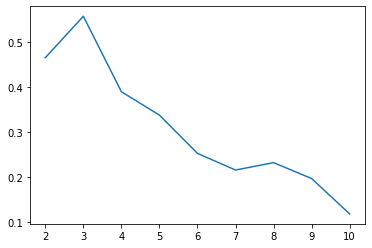

In [547]:
plt.plot(x,y)
plt.show()

Ward Hirarchical Clustering
=======================

In [548]:
# from sklearn.metrics import silhouette_score
# # from sklearn.cluster import Ward
# import sklearn.cluster.Ward

# x = []
# y = []
# for k in range(2, 11): 
#     model = Ward(n_clusters=k)
#     model.fit(X_pca.iloc[:, :3])
#     label = model.labels_
#     sil_coeff = silhouette_score(X_pca.iloc[:, :3], label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
#     x.append(k)
#     y.append(sil_coeff)

In [549]:
# plt.plot(x,y)
# plt.show()

In [550]:
# from sklearn.cluster import KMeans

# model = KMeans(n_clusters=3)
# model.fit(df)
# print(model)

In [551]:
# # Visualize the results
# import matplotlib.pyplot as plt
# X = df
# y_kmeans = model.predict(X)

# # scatter plot the petal length (column 2), petal width (column 3)
# plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')

# # show centroid centres as grey circle opacity 50%
# centers = model.cluster_centers_
# plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

In [552]:
# from matplotlib import pyplot as plt
# import seaborn as sns

# corr = df.corr()
# fig, ax = plt.subplots(figsize=(12,12))  
# sns.heatmap(corr, cmap="YlGnBu",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             ax=ax) 
# plt.show()